In [1]:
import sys
sys.path.insert(0,'/home/users/d_dsetch/Isca')
import isca_tools
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy import optimize
from scipy import stats
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.interpolate import splrep, BSpline
from scipy.interpolate import CubicSpline
from scipy.interpolate import splrep, splev
from scipy.optimize import brentq, newton
from scipy.optimize import root, fsolve
import metpy.calc as mpcalc
import xarray as xr
#from xarray.ufuncs import sin, cos, deg2rad
import math
#print(xr.__version__)

In [2]:
import sys
sys.path.append(r'home/users/d_dsetch/brian_rose/pyCESM')
from pyCESM import cam_diag
from pyCESM.cam_diag import overturning

/home/users/d_dsetch/.local/lib/python3.11/site-packages/climlab/radiation/cam3.py:46: UserWarning: Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.')
/home/users/d_dsetch/.local/lib/python3.11/site-packages/climlab/radiation/rrtm/rrtmg_lw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.')
/home/users/d_dsetch/.local/lib/python3.11/site-packages/climlab/radiation/rrtm/rrtmg_sw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.')
/home/users/d_dsetch/.local/lib/python3.11/site-pac

In [3]:
# Change the exp_name to the right simulation (use k=1 to test the code)
exp_dir = '/home/users/d_dsetch/aquaplanet'
exp_name = 'k=1'
ds = isca_tools.load_dataset(exp_name, data_dir=exp_dir)
#ds

# Holds the last 5 years of the data set --> what we want to use
ds_use = ds.sel(time = slice(720,2520))
#ds_use

In [4]:
ds

<xarray.Dataset> Size: 16GB
Dimensions:        (phalf: 26, time: 2520, nv: 2, lon: 128, lonb: 129, lat: 64,
                    latb: 65, pfull: 25)
Coordinates:
  * phalf          (phalf) float64 208B 0.0 11.77 19.67 ... 977.8 989.7 1e+03
  * time           (time) float64 20kB 0.5 1.5 2.5 ... 2.518e+03 2.52e+03
  * nv             (nv) float64 16B 1.0 2.0
  * lon            (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lonb           (lonb) float64 1kB -1.406 1.406 4.219 ... 353.0 355.8 358.6
  * lat            (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * latb           (latb) float64 520B -90.0 -86.58 -83.76 ... 83.76 86.58 90.0
  * pfull          (pfull) float64 200B 4.329 15.55 25.36 ... 970.2 983.8 994.9
Data variables: (12/27)
    pk             (time, phalf) float32 262kB dask.array<chunksize=(30, 26), meta=np.ndarray>
    height         (time, pfull, lat, lon) float32 2GB dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    temp           (time, pfull, lat, lon) float32 2GB dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    ps             (time, lat, lon) float32 83MB dask.array<chunksize=(30, 64, 128), meta=np.ndarray>
    sphum          (time, pfull, lat, lon) float32 2GB dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    ucomp          (time, pfull, lat, lon) float32 2GB dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    ...             ...
    rh_2m          (time, lat, lon) float32 83MB dask.array<chunksize=(30, 64, 128), meta=np.ndarray>
    vor            (time, pfull, lat, lon) float32 2GB dask.array<chunksize=(30, 25, 64, 128), meta=np.ndarray>
    average_T1     (time) float64 20kB dask.array<chunksize=(30,), meta=np.ndarray>
    average_T2     (time) float64 20kB dask.array<chunksize=(30,), meta=np.ndarray>
    average_DT     (time) float64 20kB dask.array<chunksize=(30,), meta=np.ndarray>
    time_bounds    (time, nv) float64 40kB dask.array<chunksize=(30, 2), meta=np.ndarray>
Attributes:
    filename:   /gpfs1/scratch/other/jamd1/isca_work/experiment/tau_sweep/aqu...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

## Annual 

In [5]:
### GMST

t_surf = ds_use.t_surf.load()
t_surf = t_surf - 273.15

weights = np.cos(np.deg2rad(t_surf.lat))
weights.name = "weights"

t_surf_weighted = t_surf.weighted(weights)
weighted_mean = t_surf_weighted.mean(("lon", "lat", "time"))
weighted_mean

<xarray.DataArray 't_surf' ()> Size: 8B
array(14.45694537)

/tmp/ipykernel_565/537013184.py:45: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]
/tmp/ipykernel_565/537013184.py:45: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]
/tmp/ipykernel_565/537013184.py:105: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]
/tmp/ipykernel_565/537013184.py:105: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]


HC closest roots [0.194289529, 29.2909354816, 38.4102885772, -29.2900686647, -29.2900686648, -38.48745788, 67.7349180571, 81.0979280447, 81.2813643148, 86.3710004587, 88.2648984987, 88.2648984988, -69.1942157218, -69.1942157219, -79.7458249182, -79.7504742366, -79.750526658, -79.7508421757, -79.7509916347, -79.7510433653, -79.7510520923, -79.7512421185]
SHCS - -29.2900686647
NHCN - 29.2909354816
ITCZ closest roots [15.136051974, 4.2887210948, 4.2836759906, 4.2681676834, 4.263297181, 4.2568284255, 4.2464225363, 4.2460522306, 4.2441622148, 4.2414440507, 4.2399746766, 4.2376550401, 4.2362361904, 4.2360856833, 4.2359179358, 4.2342857018]
ITCZ S - -14.9022426876
ITCZ N - 15.136051974


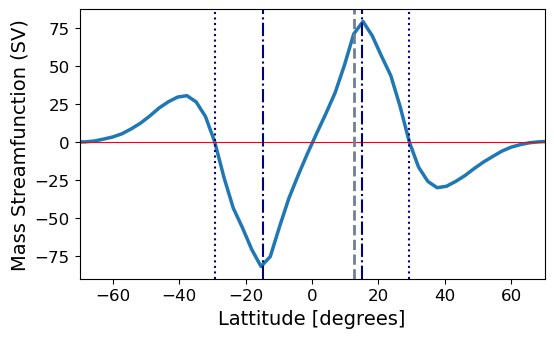

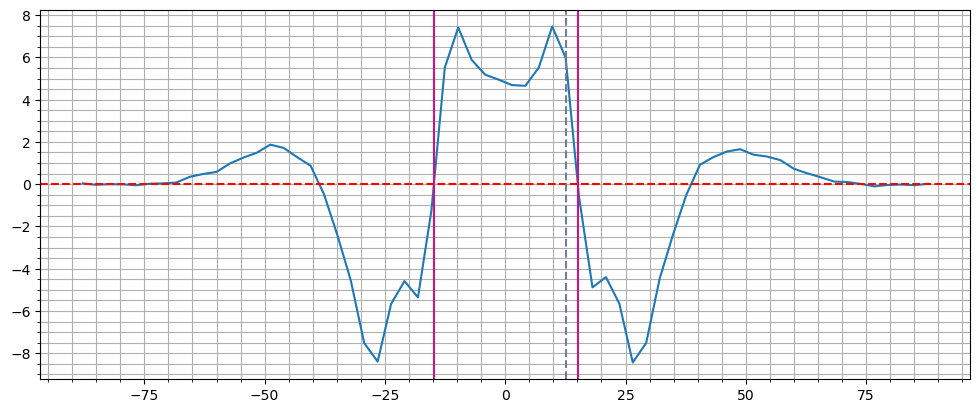

In [12]:
### Streamfunction at 500 hPa ###

vcomp = ds_use.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = ds_use.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-77.6626486165)
#Id2 = all_roots_HC.index(-77.6626486165)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(26.4713340869)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[3]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[1]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

HC_s_annual = SHC_s_lat
HC_n_annual = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
Id1 = all_roots_ITCZ.index(-14.9022426876)
#Id2 = all_roots_ITCZ.index(26.6457684595)

ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

#ITCZ_s_lat = ITCZRootFinal[1]
ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

ITCZ_s_annual = ITCZ_s_lat
ITCZ_n_annual = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure(figsize=(6, 3.5))
plt.plot(x, ynew, linewidth = 2.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth = 0.8)
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--', linewidth = 2)
plt.axvline(x=SHC_s_lat, color='navy', linestyle=':')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='navy', linestyle=':')
plt.axvline(x=ITCZ_s_lat, color='navy', linestyle='-.')
plt.axvline(x=ITCZ_n_lat, color='navy', linestyle='-.')
plt.ylabel('Mass Streamfunction (SV)', fontsize=14)
plt.xlabel('Lattitude [degrees]', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(-70, 70)
#plt.minorticks_on()
#plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## December

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC closest roots [-11.0397859934, -23.4490804406, 25.7489843041, 38.1467262865, 64.0610348053, -71.1257392302, -71.1437957687, -71.1511978941, -71.1518132383, -71.1522921456, -71.1534156308, -71.153539569, -71.1536282664, -71.153702418, -71.154266342, -71.1544982195, -71.1545091568, -71.1545987442, -71.1547872123, -71.1550202078, -71.1551906014, -71.1553573242]
SHCS - -23.4490804406
NHCN - 25.7489843041
ITCZ closest roots [4.6881807758, -15.6006199243, -25.1507542999, -25.1591354512, -25.1592023503, -25.1594115751, -25.1603800975, -25.1606327639, -25.1612051209, -25.1612526898, -25.1612933909, -25.1614934838, -25.1615761315, -25.1617878893, -25.161872172, -25.1619276876]
ITCZ S - -15.6006199243
ITCZ N - 4.6881807758


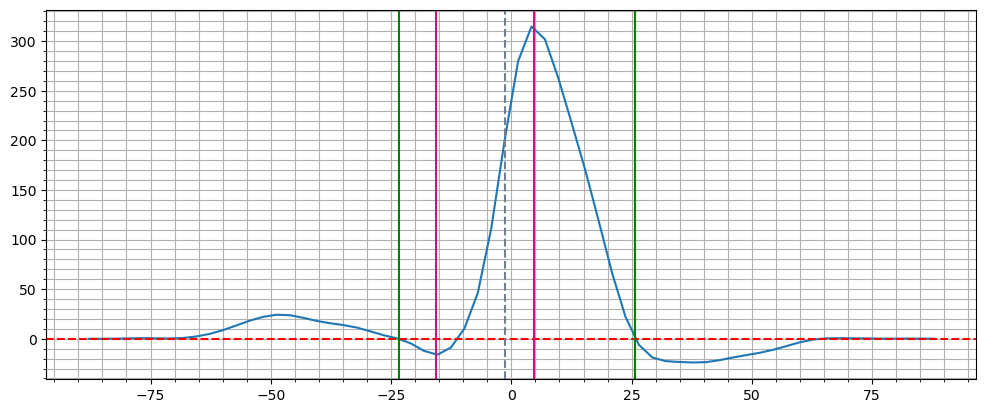

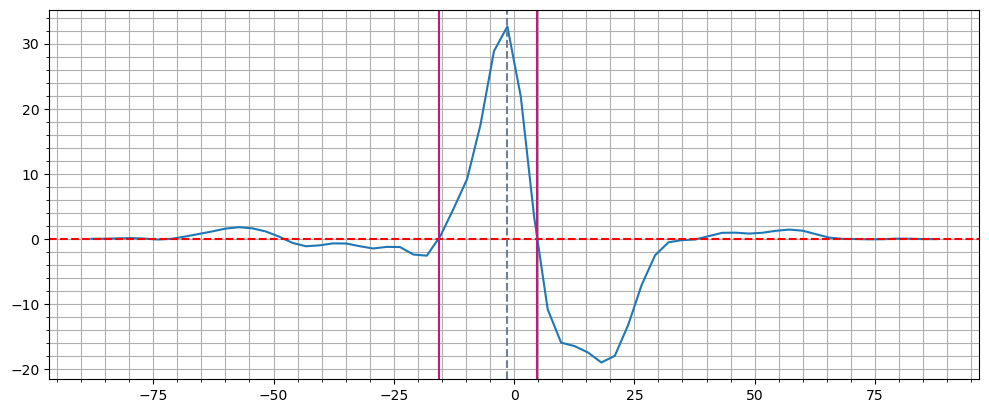

In [7]:
month = isca_tools.utils.annual_time_slice(ds_use, [12])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

dec_HC_s_lat = SHC_s_lat
dec_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[1]
ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

dec_ITCZ_s_lat = ITCZ_s_lat
dec_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## January 

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC roots [-88.4541381647, -83.49301705, -83.4887130289, -83.4878420413, -83.4765908577, -83.4745378721, -83.4733852698, -83.4732016042, -83.472706428, -83.4726839992, -83.4723972615, -83.4722434841, -83.4721747068, -83.4721384224, -83.4720312758, -83.471932598, -83.4718864186, -83.4716942833, -83.4715331617, -83.4715056552, -83.4714429193, -83.4713869312, -83.4712707482, -83.4710332558, -83.4709517894, -83.4709435504, -83.4709033296, -83.4708386759, -83.4707395423, -83.4707083273, -83.4706884626, -83.4706660778, -83.4706222323, -83.4705058023, -83.4704992181, -83.4704901921, -83.4704393304, -83.4704266282, -83.4704055934, -83.470356497, -83.4703328369, -83.47032569, -83.4703222078, -83.4703082137, -83.4703022073, -83.4702850899, -83.4702815899, -83.4702717577, -83.4702554041, -83.4702205588, -83.4701868431, -83.470163214, -83.4701606477, -83.4701575397, -83.4701371801, -83.4701167838, -83.470116263, -83.4701088776, -83.470097642, -83.470067432, -83.4700172582, -83.4699961482, -83.46993

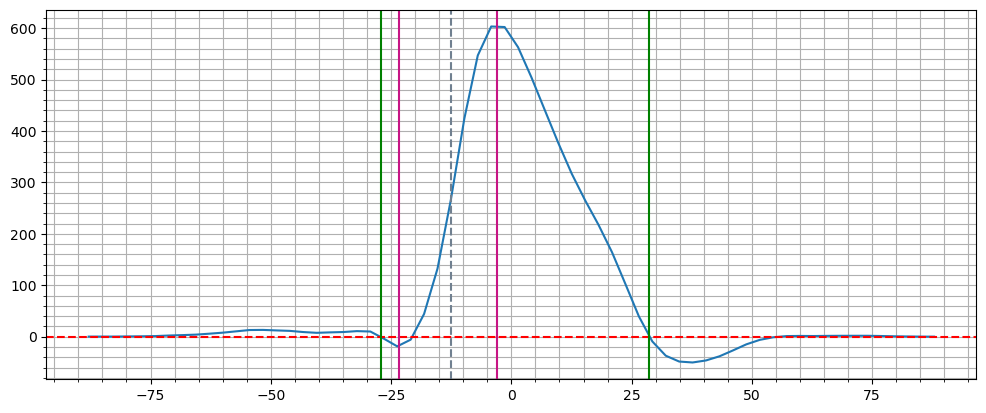

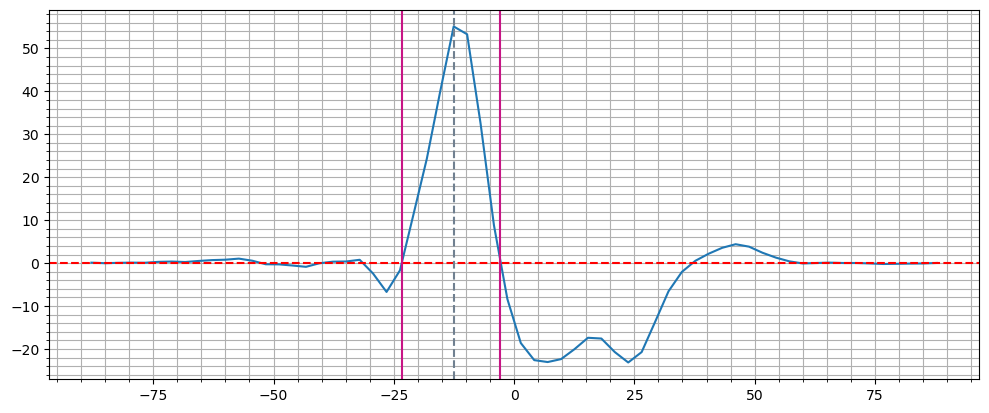

In [11]:
month = isca_tools.utils.annual_time_slice(ds_use, [1])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
Id4 = all_roots_HC.index(28.6647952594)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
#NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

jan_HC_s_lat = SHC_s_lat
jan_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[1]
ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

jan_ITCZ_s_lat = ITCZ_s_lat
jan_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## February

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC closest roots [-23.8508378495, -29.7019545899, -35.5460209301, -35.5538220674, -35.5547784206, -35.5554797501, -35.5557348755, -35.5582612001, -35.5595977553, -35.560098506, -35.5763963465, -37.2370674489, -42.9122918789, -42.9383474959, -42.9707169151, -42.9733200214, -42.9747471344, -42.9758407127, -42.9760817064, -42.9761557415, -42.9772383643, -42.9772791739]
SHCS - -29.7019545899
NHCN - 30.0161053168
ITCZ closest roots [-17.6713801568, -17.6807140186, -17.6808227701, -17.6815375548, -17.6815726653, -17.6823036506, -17.6827069037, -17.6828885291, -17.6831239949, -17.6831735715, -17.683186046, -17.6833642535, -17.6834512427, -17.6834956833, -17.6835432359, -17.683547736]
ITCZ S - -26.3182867363
ITCZ N - -1.5130682822


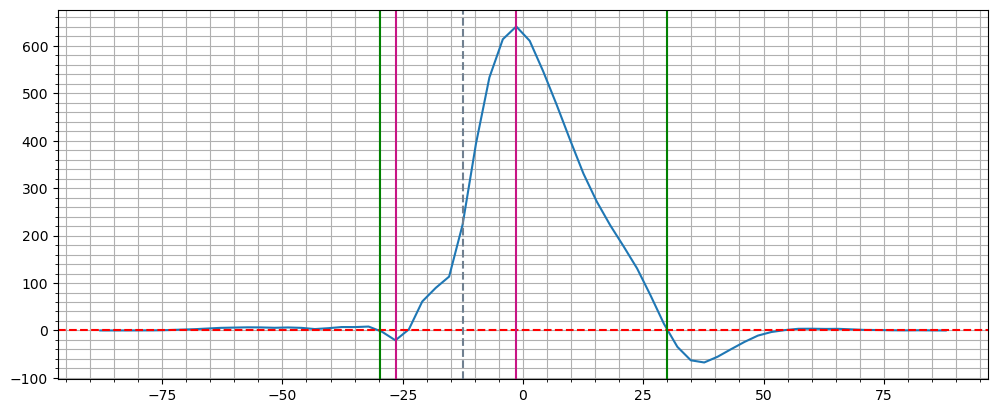

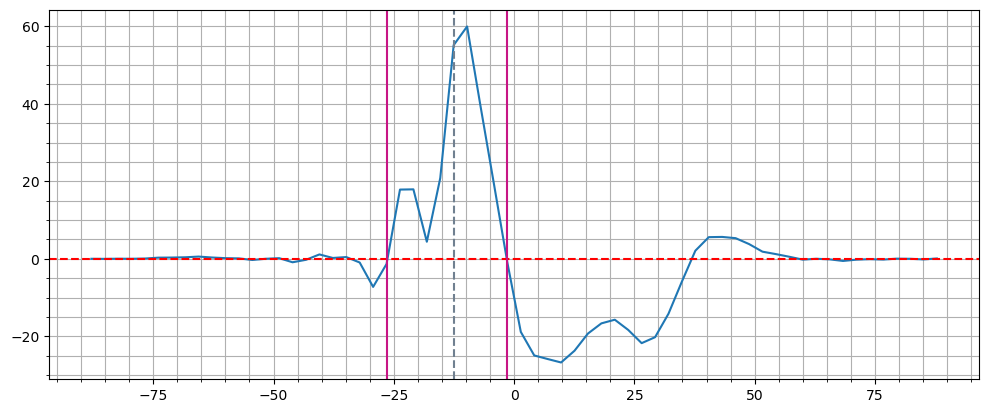

In [14]:
month = isca_tools.utils.annual_time_slice(ds_use, [2])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
#NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

feb_HC_s_lat = SHC_s_lat
feb_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
Id1 = all_roots_ITCZ.index(-26.3182867363)
Id2 = all_roots_ITCZ.index(-1.5130682822)

ITCZ_s_lat = all_roots_ITCZ[Id1]
ITCZ_n_lat = all_roots_ITCZ[Id2]

#ITCZ_s_lat = ITCZRootFinal[1]
#ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

feb_ITCZ_s_lat = ITCZ_s_lat
feb_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## March

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC roots [-88.4511722333, -84.8041172866, -81.3349858964, -57.7944535415, -57.343825282, -42.5365960573, -42.5363009368, -42.5359167572, -42.5352876127, -42.5352232968, -42.5347759278, -42.5347735487, -42.5344242047, -42.5342271756, -42.5341810481, -42.533973407, -42.5336822561, -42.5334130087, -42.5333622676, -42.5333466263, -42.5332777103, -42.5330304172, -42.5329789297, -42.5329328237, -42.5329099674, -42.5328924699, -42.5328859938, -42.5328545054, -42.5327858727, -42.5327718393, -42.5326089004, -42.5326030506, -42.5326028168, -42.5325844427, -42.5325741305, -42.5325436856, -42.5325297084, -42.5325207685, -42.5325171976, -42.5324914467, -42.5324848555, -42.5324794305, -42.5324477394, -42.5322995522, -42.5321289351, -42.5321050753, -42.5320791845, -42.5320281854, -42.5320108326, -42.5319479532, -42.5317668971, -42.5315404873, -42.5313599736, -42.5313322079, -42.5308915484, -42.5308734746, -42.5308703568, -42.5308568309, -42.53062159, -42.5303909069, -42.5303760353, -42.5303359785, -4

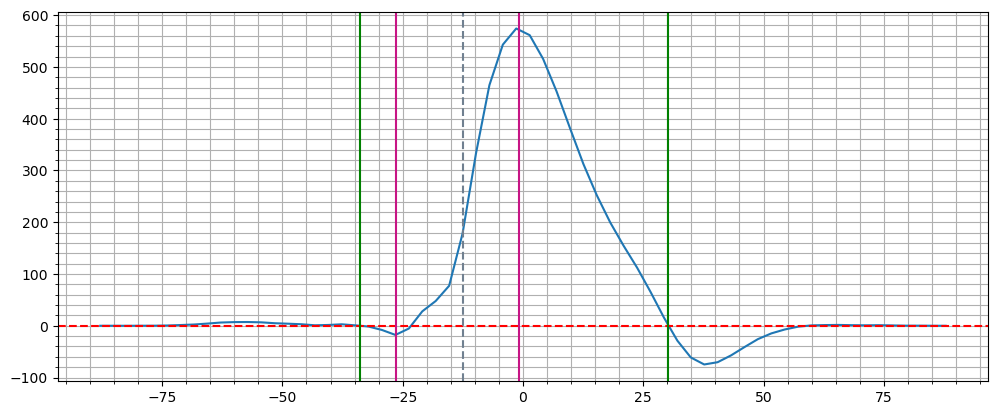

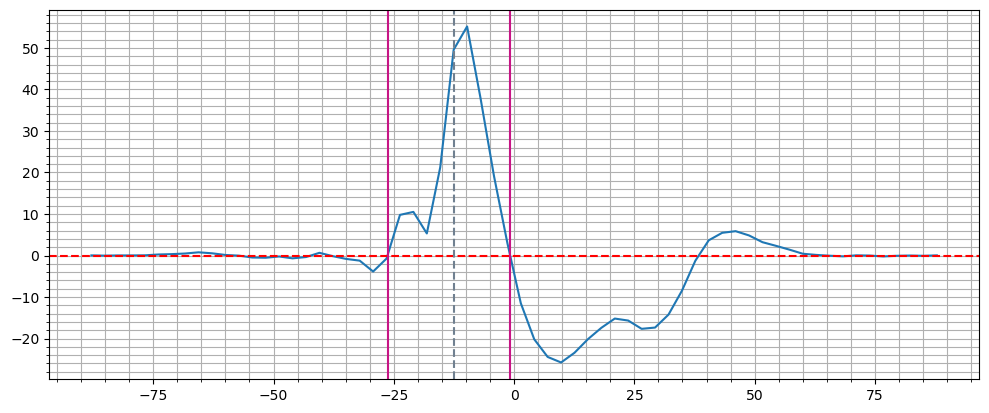

In [19]:
month = isca_tools.utils.annual_time_slice(ds_use, [3])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
Id4 = all_roots_HC.index(30.2321076383)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
#NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

mar_HC_s_lat = SHC_s_lat
mar_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
Id1 = all_roots_ITCZ.index(-26.3064824642)
Id2 = all_roots_ITCZ.index(-0.8828357824)

ITCZ_s_lat = all_roots_ITCZ[Id1]
ITCZ_n_lat = all_roots_ITCZ[Id2]

#ITCZ_s_lat = ITCZRootFinal[1]
#ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

mar_ITCZ_s_lat = ITCZ_s_lat
mar_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## April

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC closest roots [-17.1175304864, -38.1490433368, 29.0412739711, 60.3836752435, 60.3836752436, 60.3836752437, -86.6344951428, -86.6344951429, -86.634495143, -86.6344951432, -86.9324373569, -86.932437357, -112.9281894673, 89.1289731104, 89.1568996675, 89.16647456, 89.1669133275, 89.1729414599, 89.177743581, 89.1825656875, 89.1846166801, 89.1847022864]
SHCS - -38.1490433368
NHCN - 29.0412739711
ITCZ closest roots [-24.3304331894, 4.4972559363, -38.3347843874, -38.3483994109, -38.3516423861, -38.3525580244, -38.3526537398, -38.3529382007, -38.3539694983, -38.3546413206, -38.3547699009, -38.3550135609, -38.3555425703, -38.3555576289, -38.3556138355, -38.3557731408]
ITCZ S - -24.3304331894
ITCZ N - 4.4972559363


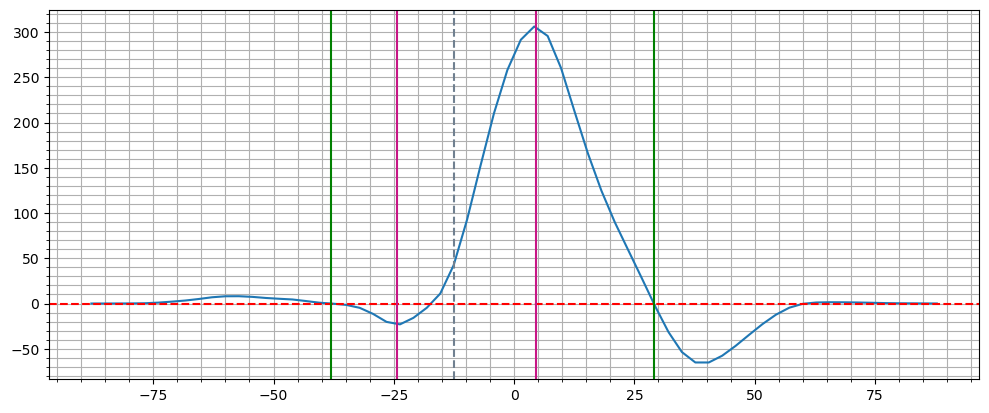

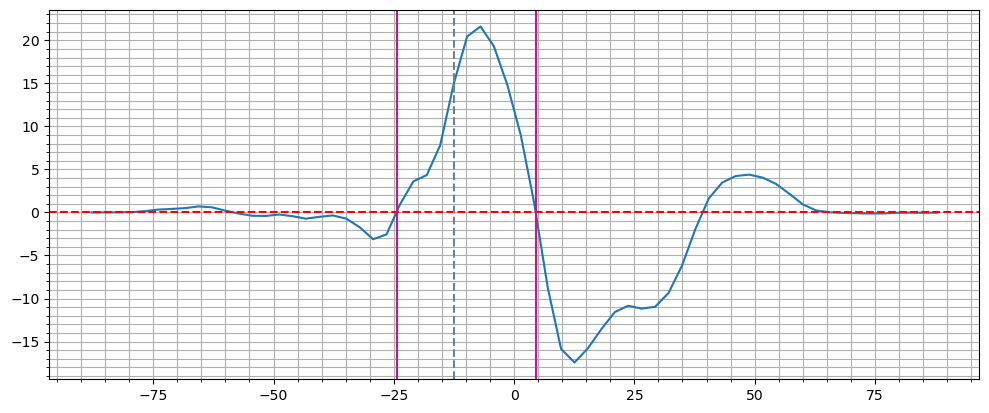

In [21]:
month = isca_tools.utils.annual_time_slice(ds_use, [4])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

apr_HC_s_lat = SHC_s_lat
apr_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[0]
ITCZ_n_lat = ITCZRootFinal[1]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

apr_ITCZ_s_lat = ITCZ_s_lat
apr_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## May

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC closest roots [-4.307023589, -32.042795048, 26.2396549876, 59.9792298375, 79.8546919331, 79.8546919332, -88.7712682168, -88.9016213889, -88.9341128598, -88.9343835046, -88.9362398788, -88.9367263601, -88.937111693, -88.9371652402, -88.9379160934, -88.9383701298, -88.9385607821, -88.9386701007, -88.939036294, -88.9392967674, -88.9396052523, -88.9396839161]
SHCS - -32.042795048
NHCN - 26.2396549876
ITCZ closest roots [-11.3754507359, 6.0679859289, -45.6944160296, 42.4026468998, -59.7232545835, -59.7255759921, -59.7280193053, -59.7294809135, -59.729835269, 64.6099053508, 64.6099053509, -76.0973892067, -76.1148919865, -76.1205279332, -76.1206768803, -76.1212253422]
ITCZ S - -11.3754507359
ITCZ N - 6.0679859289


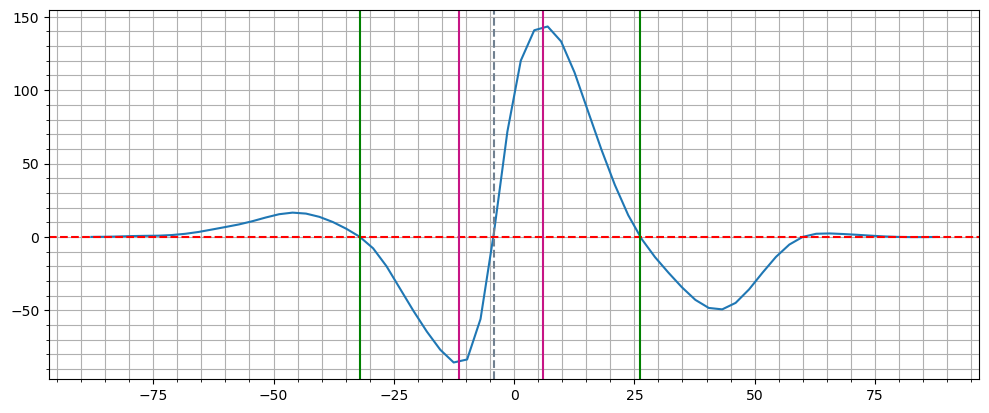

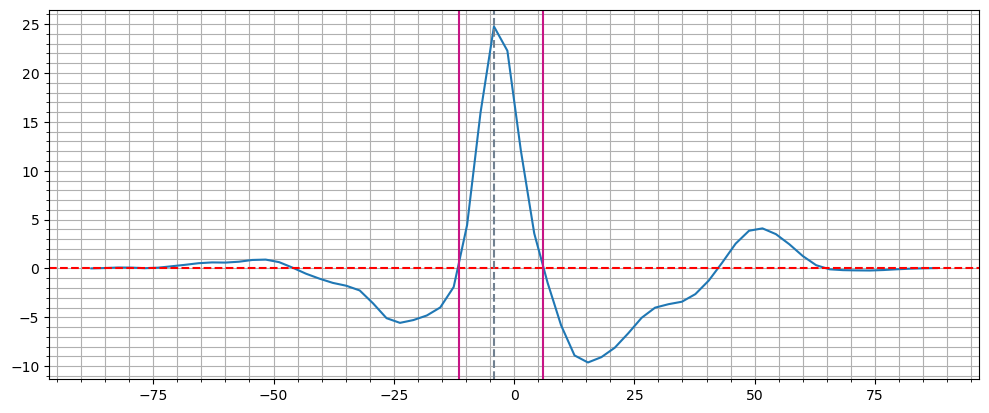

In [23]:
month = isca_tools.utils.annual_time_slice(ds_use, [5])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

may_HC_s_lat = SHC_s_lat
may_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[0]
ITCZ_n_lat = ITCZRootFinal[1]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

may_ITCZ_s_lat = ITCZ_s_lat
may_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## June

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC closest roots [12.3669619646, 24.4145136195, -25.6571813373, 65.6044649012, 65.6044649013, -71.9596455708, -71.9596455709, -78.1797020119, 88.7767880655, -88.8897752358, -88.9041531702, -88.9066482178, -88.9069560009, -88.907689347, -88.9077900209, -88.9080086683, -88.9081405941, -88.9084817861, -88.9086297011, -88.9088663811, -88.9089689922, -88.9090057334]
SHCS - -25.6571813373
NHCN - 24.4145136195
ITCZ closest roots [-4.559436349, 17.1096886181, 30.234593605, 30.2409820786, 30.2429909968, 30.2450958619, 30.2457240663, 30.2476194599, 30.2477482377, 30.2478217358, 30.2479734142, 30.2479873646, 30.2483281317, 30.2484124891, 30.2484682655, 30.2489803416]
ITCZ S - -4.559436349
ITCZ N - 17.1096886181


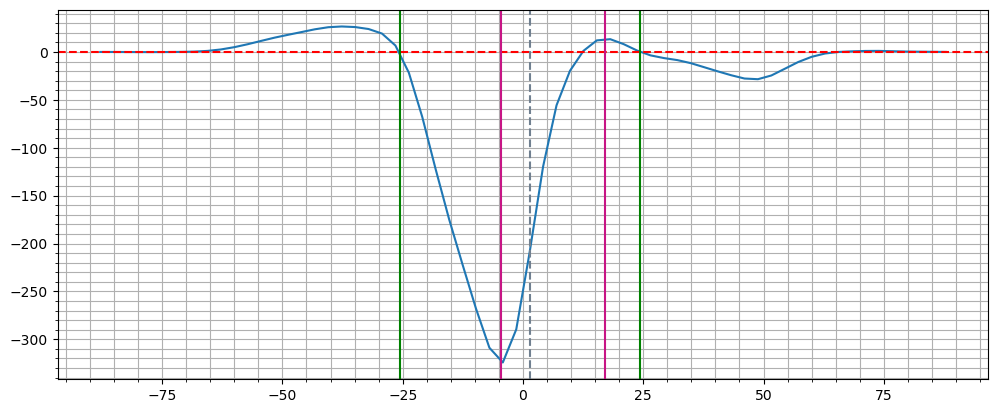

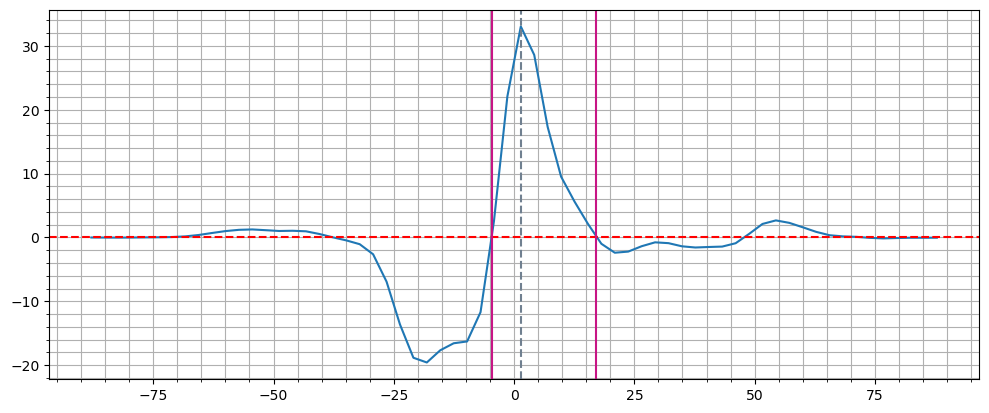

In [25]:
month = isca_tools.utils.annual_time_slice(ds_use, [6])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[2]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[1]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

jun_HC_s_lat = SHC_s_lat
jun_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[0]
ITCZ_n_lat = ITCZRootFinal[1]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

jun_ITCZ_s_lat = ITCZ_s_lat
jun_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## July

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


HC roots [-88.2071388325, -86.1151729105, -58.1334616591, -28.5727579611, 20.9972636708, 20.9972636709, 27.699833306, 33.1072549325, 33.1299254963, 33.1340559636, 33.1489770196, 33.1496223985, 33.1533911624, 33.1552680287, 33.1553648008, 33.1557760739, 33.1565125184, 33.1575839431, 33.1581909948, 33.1584565387, 33.1595247842, 33.1602975263, 33.1627803803, 33.1680414104, 33.1701640287, 33.182069664, 33.2163260213, 41.2173719913, 41.2466893626, 41.2494122473, 41.2513593161, 41.2530203579, 41.2534756125, 41.2537613771, 41.2540393231, 41.2544376835, 41.2593902141, 41.260003723, 41.2613370537, 41.2660850286, 41.2761628184, 70.2342178192, 78.8363733494, 81.1085643744, 84.0866418973, 88.4368172634]
HC closest roots [20.9972636708, 20.9972636709, 27.699833306, 33.1072549325, 33.1299254963, 33.1340559636, 33.1489770196, 33.1496223985, 33.1533911624, 33.1552680287, 33.1553648008, 33.1557760739, 33.1565125184, 33.1575839431, 33.1581909948, 33.1584565387, 33.1595247842, 33.1602975263, 33.162780380

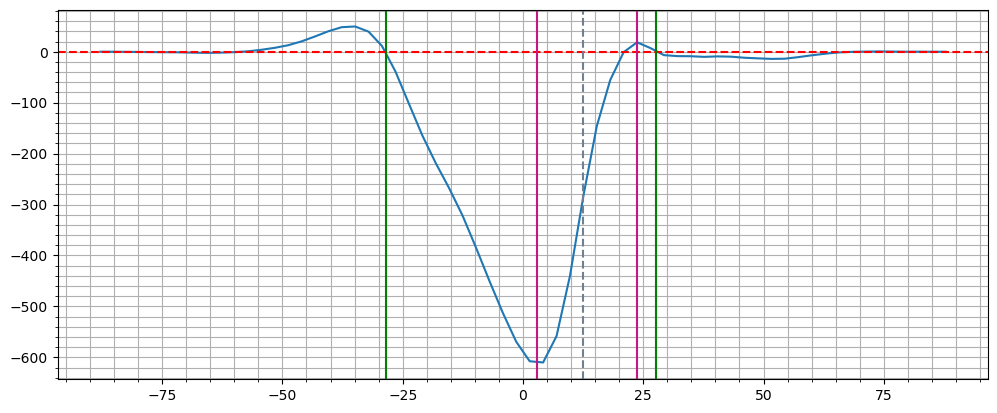

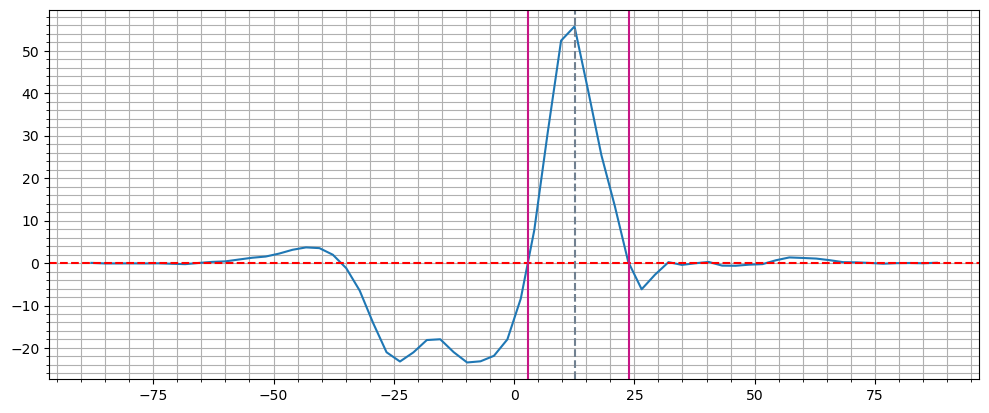

In [28]:
month = isca_tools.utils.annual_time_slice(ds_use, [7])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

#SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

jul_HC_s_lat = SHC_s_lat
jul_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[0]
ITCZ_n_lat = ITCZRootFinal[1]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

jul_ITCZ_s_lat = ITCZ_s_lat
jul_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## August

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC roots [-88.3048885013, -88.3048885012, -85.7565514926, -85.7565514925, -85.7565514924, -80.2882426665, -80.2850695104, -80.2846750363, -80.2838644179, -80.2835953821, -80.2834967401, -80.2826426641, -80.2821573571, -80.2811251848, -80.2808565158, -80.2632711644, -73.160758608, -71.7203707158, -71.7160298332, -71.7125914354, -71.7092773289, -71.7067329607, -71.682252875, -71.6724142821, -61.5031573301, -61.4932380901, -61.491672903, -61.491422916, -61.4909770911, -61.4908212233, -61.490786504, -61.4895843461, -61.4874398309, -61.4810488267, -55.7907730255, -55.7907730254, -30.1225931365, 24.1883975531, 29.6124310494, 35.47497892, 35.4774720894, 35.4775127449, 35.4780828824, 35.4794854534, 35.4805694904, 35.4809872425, 35.4811581568, 35.4812522072, 35.4813032598, 35.4813361933, 35.4814179783, 35.4815704615, 35.4816905665, 35.4817847853, 35.481897562, 35.4819252663, 35.4819301805, 35.4821652997, 35.4822969631, 35.4823126237, 35.4823819291, 35.4825667191, 35.482593065, 35.4826126352, 35

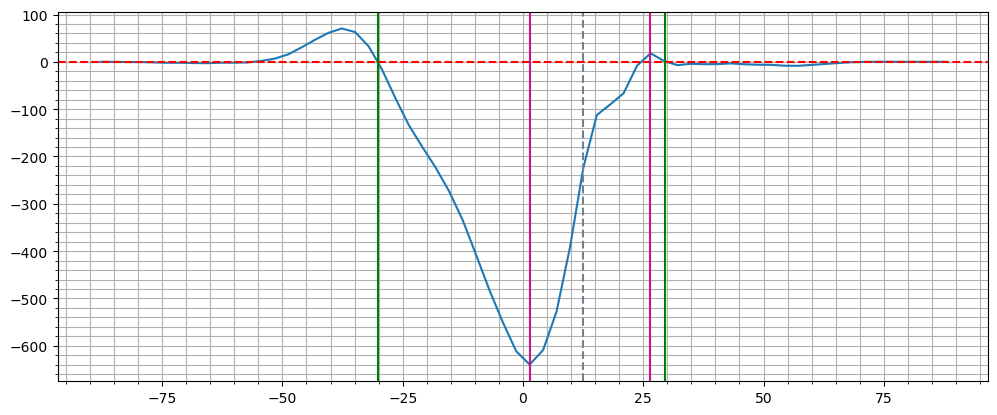

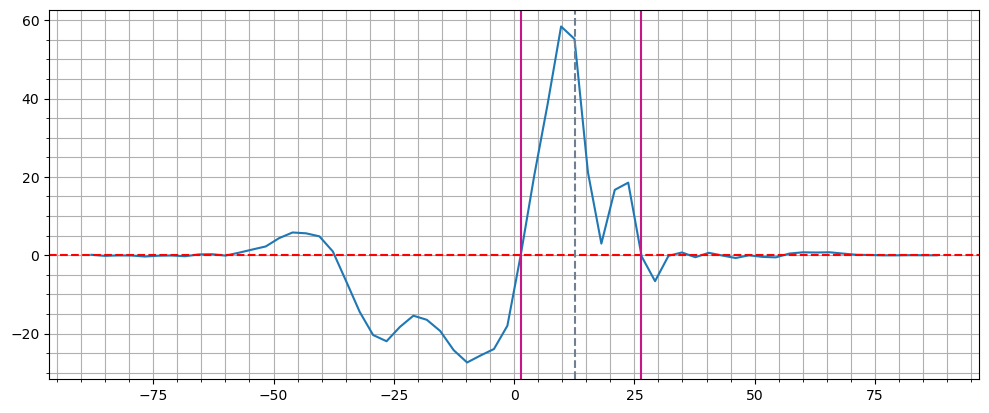

In [38]:
month = isca_tools.utils.annual_time_slice(ds_use, [8])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
Id1 = all_roots_HC.index(-30.1225931365)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

#SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[1]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

aug_HC_s_lat = SHC_s_lat
aug_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
Id1 = all_roots_ITCZ.index(1.380149624)
Id2 = all_roots_ITCZ.index(26.4673319296)

ITCZ_s_lat = all_roots_ITCZ[Id1]
ITCZ_n_lat = all_roots_ITCZ[Id2]

#ITCZ_s_lat = ITCZRootFinal[1]
#ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

aug_ITCZ_s_lat = ITCZ_s_lat
aug_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## September

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC closest roots [22.7632249278, 30.989347705, 39.5609487903, 44.0986955577, 54.862546518, -30.5973925064, 73.5175926097, 78.7584990675, 78.7584990676, 80.3586013214, -56.4872047718, 86.0404611398, -62.1448673814, 88.3956357571, 88.3956357572, -79.9254207621, -79.9309290702, -79.931141593, -79.9316486291, -79.9319607953, -79.9324935192, -79.9331649845]
SHCS - -30.5973925064
NHCN - 30.989347705
All ITCZ Roots [-86.6898230593, -81.9711230402, -79.9348387508, -79.9348387507, -73.2322353192, -73.23069599, -73.2304699828, -73.2294779789, -73.2293447803, -73.2290456328, -73.228937293, -73.2287787444, -73.2283848981, -73.2283797628, -73.2283748695, -73.228000323, -73.2279593707, -73.2278096745, -73.2277867749, -73.2277499316, -73.2268507866, -73.2261275827, -62.1099168424, -62.1099168423, -38.8705457523, -22.324867104, -22.2954595036, -22.2861713905, 0.8561731154, 18.0437787638, 18.0457439447, 18.0459385174, 18.0468435021, 18.0470077757, 18.0470528241, 18.047301116, 18.0473160847, 18.04743700

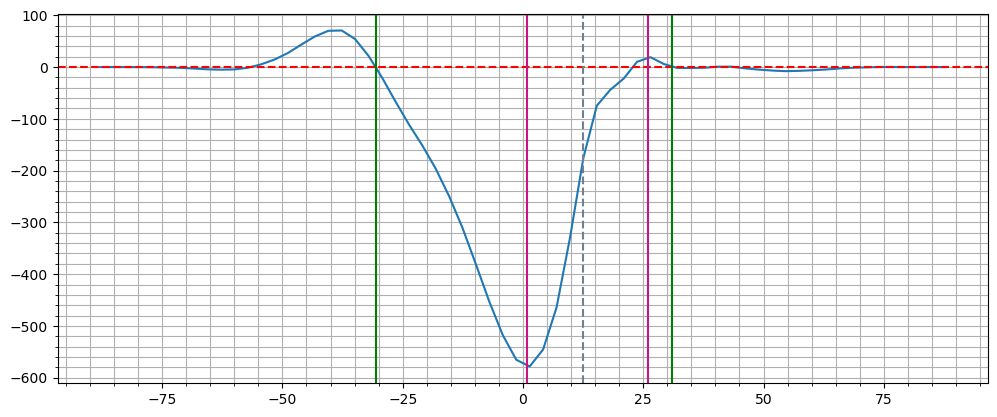

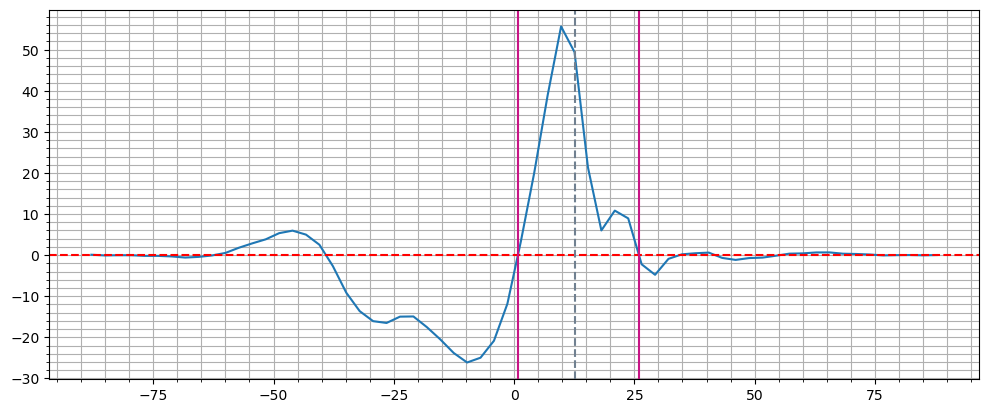

In [41]:
month = isca_tools.utils.annual_time_slice(ds_use, [9])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[5]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[1]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

sep_HC_s_lat = SHC_s_lat
sep_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
Id1 = all_roots_ITCZ.index(0.8561731154)
Id2 = all_roots_ITCZ.index(25.9038066462)

ITCZ_s_lat = all_roots_ITCZ[Id1]
ITCZ_n_lat = all_roots_ITCZ[Id2]

#ITCZ_s_lat = ITCZRootFinal[1]
#ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

sep_ITCZ_s_lat = ITCZ_s_lat
sep_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## October

HC closest roots [16.9141487584, 39.616542079, -28.5810882813, 74.0891177364, 74.0891177365, -58.7321268578, 87.5202632508, 87.5202632509, 87.520263251, 87.7630298557, 87.7630298558, 87.7630298559, 87.763029856, -85.0339426261, -85.0339426262, -88.861836957, -88.8618369571, -93.5279347406, 1000.0, 1000.0, 1000.0, 1000.0]
SHCS - -28.5810882813
NHCN - 39.616542079
ITCZ closest roots [24.000041762, -4.4145543575, 35.6471213301, 35.649292128, 35.6516506548, 35.6523501252, 35.6528088123, 35.6537751724, 35.6539572993, 35.6539601647, 35.6540465384, 35.6543800932, 35.6544064102, 35.6544661803, 35.6548422218, 35.6549092386]
ITCZ S - -4.4145543575
ITCZ N - 24.000041762


/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


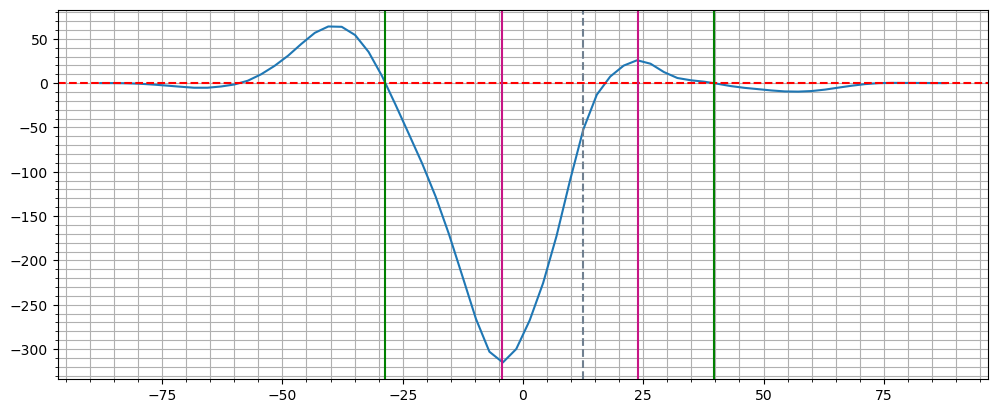

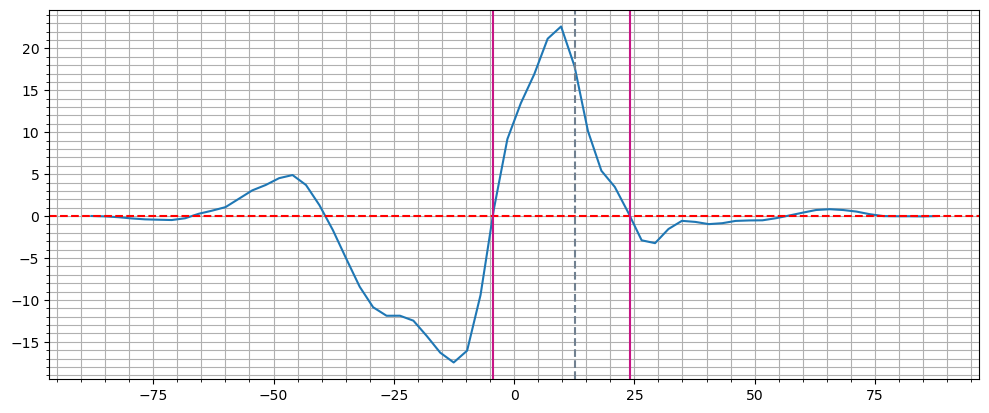

In [44]:
month = isca_tools.utils.annual_time_slice(ds_use, [10])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[2]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[1]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

oct_HC_s_lat = SHC_s_lat
oct_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[1]
ITCZ_n_lat = ITCZRootFinal[0]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

oct_ITCZ_s_lat = ITCZ_s_lat
oct_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## November

/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/jaspy/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


HC closest roots [4.1098104783, -26.7408547724, 32.2425735496, -58.5756728021, 75.8351541837, -74.7990045166, -74.7990045167, -80.4938404592, 84.551012967, 88.3408236255, -89.2214196375, -89.2214196376, -91.053327995, -91.0533279951, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
SHCS - -26.7408547724
NHCN - 32.2425735496
ITCZ closest roots [-6.5989596692, 11.148805105, -28.9642117201, 38.5354248302, 38.5451816833, 38.5473543279, 38.5475961037, 38.5489149913, 38.5494253484, 38.549671505, 38.5496794836, 38.5506086321, 38.5506655269, 38.550683156, 38.5508377521, 38.5510265378]
ITCZ S - -6.5989596692
ITCZ N - 11.148805105


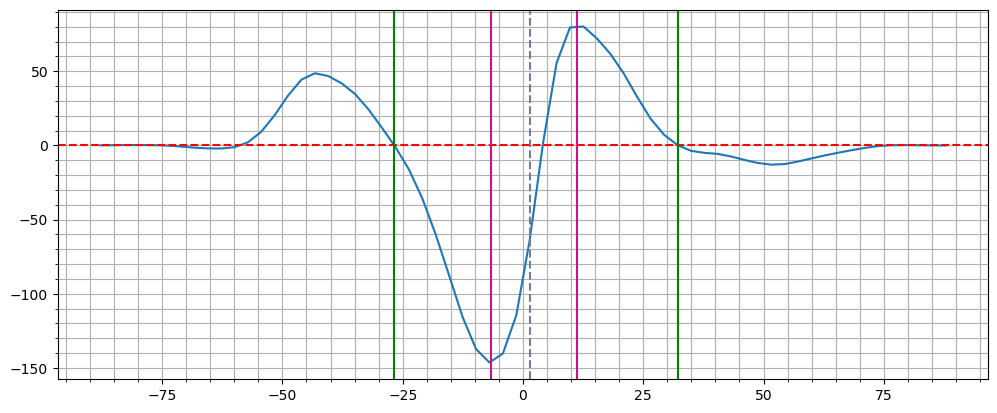

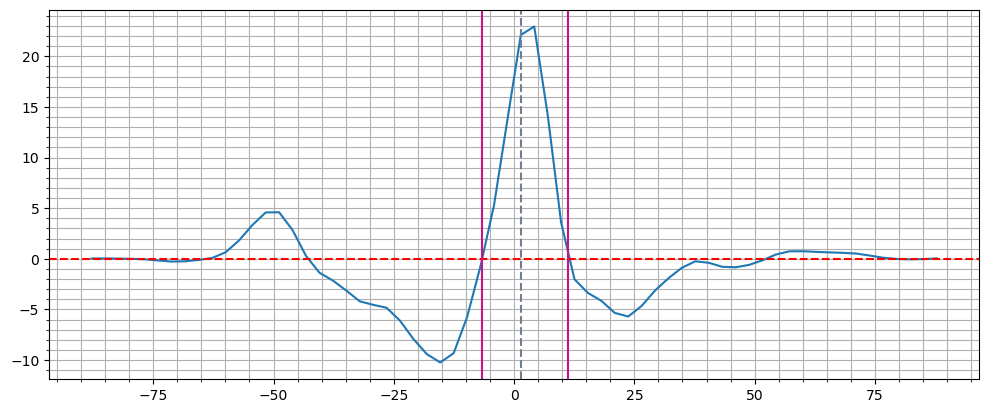

In [46]:
month = isca_tools.utils.annual_time_slice(ds_use, [11])

### Streamfunction at 500 hPa ###

vcomp = month.vcomp.load()
vcomp_zonal_mean = vcomp.mean(("lon"))
vcomp_zonal_mean = vcomp_zonal_mean.mean(("time"))
vcomp_zonal_mean = vcomp_zonal_mean.squeeze()

stream_function = overturning(vcomp_zonal_mean, lat = vcomp_zonal_mean.lat, lev = vcomp_zonal_mean.pfull)
#stream_function

pressure_use = 500
streamfunction_use = stream_function.sel(pfull=[pressure_use], method='nearest')

###########################################################################################################################################################################################
### Precip data ###

precip = month.precipitation.load()
precip_zonal_mean = precip.mean(dim="lon")
precip_zonal_mean_use = precip_zonal_mean.mean(dim="time")

max_precip = max(precip_zonal_mean_use)
max_precip_lat = max_precip['lat'].values
HC_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]
ITCZ_max_precip_lat_vec = [max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat,max_precip_lat]

############################################################################################################################################################################################
### Spline interpolation ###

x = streamfunction_use['lat'].values
y = streamfunction_use.values # zonal means of the t_surf data 
y = y.squeeze() # Makes y the same length as x 

tck = splrep(x, y, s=0)

# Spline evaluation 
ynew = interpolate.splev(x, tck, der=0)      # Use to define Hadley Cell boundaries
yder = interpolate.splev(x, tck, der=1)      # Used to define ITCZ width 

###########################################################################################################################################################################################
### Find the HC roots ### 

def find_zero(lat):
    return splev(lat, tck, der=0)
    
roots = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_HC = np.unique(np.round(roots, 10))

# Print the solutions
#print('HC roots', sorted(all_roots_HC))

############################################################################################################################################################################################
### Roots ###

# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
HCRootFinal = []

for h in range(len(HC_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_HC)):
        Diff = HC_max_precip_lat_vec[h] - all_roots_HC[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_HC[Id] 
    HCRootFinal.append(z)  
    for l in range(len(all_roots_HC)): 
        if l == Id:
            all_roots_HC[l] = 1000

print('HC closest roots', HCRootFinal)

all_roots_HC = sorted(all_roots_HC)
#Id1 = all_roots_HC.index(-28.5727579611)
#Id2 = all_roots_HC.index(25.3855291335)
#Id3 = all_roots_HC.index(-14.9022426876)
#Id4 = all_roots_HC.index(30.0161053168)

#SHC_s_lat = all_roots_HC[Id1]
#SHC_n_lat = all_roots_HC[Id2]
#NHC_s_lat = all_roots_HC[Id3]
#NHC_n_lat = all_roots_HC[Id4]

SHC_s_lat = HCRootFinal[1]
SHC_n_lat = HCRootFinal[0]
NHC_s_lat = HCRootFinal[0]
NHC_n_lat = HCRootFinal[2]

print('SHCS -', SHC_s_lat)
#print('SHCN -',SHC_n_lat)
#print('NHCS -',NHC_s_lat)
print('NHCN -',NHC_n_lat)

nov_HC_s_lat = SHC_s_lat
nov_HC_n_lat = NHC_n_lat

############################################################################################################################################################################################
### Find the ITCZ roots ### 

def find_zero(lat):
    return splev(lat, tck, der=1)
    
roots_ITCZ = [fsolve(find_zero, y0)[0] for y0 in np.linspace(x.min(), x.max(), 800)]

# Remove duplicate roots
all_roots_ITCZ = np.unique(np.round(roots_ITCZ, 10))

# Print the solutions
#print('All ITCZ Roots', sorted(all_roots_ITCZ))

############################################################################################################################################################################################
# Empty list which will hold the difference between the peak precipiation latitiude and the roots 
ITCZRootFinal = []

for h in range(len(ITCZ_max_precip_lat_vec)):
    DiffAbList = []
    for j in range(len(all_roots_ITCZ)):
        Diff = ITCZ_max_precip_lat_vec[h] - all_roots_ITCZ[j]
        Diff = abs(Diff)
        DiffAbList.append(Diff)
        LD = min(DiffAbList)
        Id = DiffAbList.index(LD)
        z = all_roots_ITCZ[Id] 
    ITCZRootFinal.append(z)  
    for l in range(len(all_roots_ITCZ)): 
        if l == Id:
            all_roots_ITCZ[l] = 1000

print('ITCZ closest roots', ITCZRootFinal)

all_roots_ITCZ = sorted(all_roots_ITCZ)
#Id1 = all_roots_ITCZ.index(-26.3182867363)
#Id2 = all_roots_ITCZ.index(-1.5130682822)

#ITCZ_s_lat = all_roots_ITCZ[Id1]
#ITCZ_n_lat = all_roots_ITCZ[Id2]

ITCZ_s_lat = ITCZRootFinal[0]
ITCZ_n_lat = ITCZRootFinal[1]

print('ITCZ S -', ITCZ_s_lat)
print('ITCZ N -', ITCZ_n_lat)

nov_ITCZ_s_lat = ITCZ_s_lat
nov_ITCZ_n_lat = ITCZ_n_lat


############################################################################################################################################################################################
### Plots ###

plt.figure().set_figwidth(12)
plt.plot(x, ynew)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=SHC_s_lat, color='g', linestyle='-')
#plt.axvline(x=SHC_n_lat, color='g', linestyle='-')
#plt.axvline(x=NHC_s_lat, color='g', linestyle='-')
plt.axvline(x=NHC_n_lat, color='g', linestyle='-')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()

plt.figure().set_figwidth(12)
plt.plot(x, yder)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x= max_precip_lat, color='slategrey', linestyle='--')
plt.axvline(x=ITCZ_s_lat, color='mediumvioletred', linestyle='-')
plt.axvline(x=ITCZ_n_lat, color='mediumvioletred', linestyle='-')
plt.grid(which = "minor")
plt.minorticks_on()
plt.grid()
plt.show()



## Final latitudes

### Annual 

In [47]:
print('HC Latitudes:', HC_s_annual, HC_n_annual)
print('ITCZ Latitudes:', ITCZ_s_annual, ITCZ_n_annual)

HC Latitudes: -29.2900686647 29.2909354816
ITCZ Latitudes: -14.9022426876 15.136051974


### Monthly

In [48]:
HC_s_lat = [dec_HC_s_lat, jan_HC_s_lat, feb_HC_s_lat, mar_HC_s_lat, apr_HC_s_lat, may_HC_s_lat, jun_HC_s_lat, jul_HC_s_lat, aug_HC_s_lat, sep_HC_s_lat, oct_HC_s_lat, nov_HC_s_lat]
HC_n_lat = [dec_HC_n_lat, jan_HC_n_lat, feb_HC_n_lat, mar_HC_n_lat, apr_HC_n_lat, may_HC_n_lat, jun_HC_n_lat, jul_HC_n_lat, aug_HC_n_lat, sep_HC_n_lat, oct_HC_n_lat, nov_HC_n_lat]

ITCZ_s_lat = [dec_ITCZ_s_lat, jan_ITCZ_s_lat, feb_ITCZ_s_lat, mar_ITCZ_s_lat, apr_ITCZ_s_lat, may_ITCZ_s_lat, jun_ITCZ_s_lat, jul_ITCZ_s_lat, aug_ITCZ_s_lat, sep_ITCZ_s_lat, oct_ITCZ_s_lat, nov_ITCZ_s_lat]
ITCZ_n_lat = [dec_ITCZ_n_lat, jan_ITCZ_n_lat, feb_ITCZ_n_lat, mar_ITCZ_n_lat, apr_ITCZ_n_lat, may_ITCZ_n_lat, jun_ITCZ_n_lat, jul_ITCZ_n_lat, aug_ITCZ_n_lat, sep_ITCZ_n_lat, oct_ITCZ_n_lat, nov_ITCZ_n_lat]

print('HC s lat:')
for lat in HC_s_lat:
    print(lat)

print('HC n lat:')
for lat in HC_n_lat:
    print(lat)

print('ITCZ s lat:')
for lat in ITCZ_s_lat:
    print(lat)

print('ITCZ n lat:')
for lat in ITCZ_n_lat:
    print(lat)

HC s lat:
-23.4490804406
-27.1122282699
-29.7019545899
-33.7811382838
-38.1490433368
-32.042795048
-25.6571813373
-28.5727579611
-30.1225931365
-30.5973925064
-28.5810882813
-26.7408547724
HC n lat:
25.7489843041
28.6647952594
30.0161053168
30.2321076383
29.0412739711
26.2396549876
24.4145136195
27.699833306
29.6124310494
30.989347705
39.616542079
32.2425735496
ITCZ s lat:
-15.6006199243
-23.3359137703
-26.3182867363
-26.3064824642
-24.3304331894
-11.3754507359
-4.559436349
2.9851948825
1.380149624
0.8561731154
-4.4145543575
-6.5989596692
ITCZ n lat:
4.6881807758
-2.9014015729
-1.5130682822
-0.8828357824
4.4972559363
6.0679859289
17.1096886181
23.7832481518
26.4673319296
25.9038066462
24.000041762
11.148805105
